In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset=pd.get_dummies(dataset,drop_first=True)

indep = dataset[['Age','EstimatedSalary','Gender_Male']]
dep = dataset['Purchased']

X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=0.3, random_state=0)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pram_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gsv = GridSearchCV(RandomForestClassifier(), param_grid=pram_grid, cv=5, n_jobs=-1, verbose=2)
gsv.fit(X_train, y_train)
gsv.best_params_


Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [5]:
rfClassifier = RandomForestClassifier(**gsv.best_params_)
rfClassifier.fit(X_train, y_train)
y_pred = rfClassifier.predict(X_test)

In [6]:
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



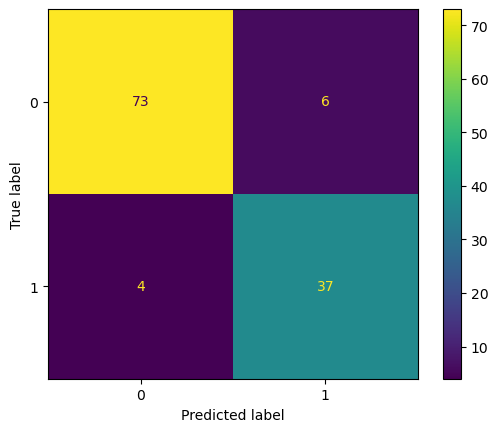

In [7]:
ConfusionMatrixDisplay(cf).plot()